In [38]:
import numpy as np

from michigrad2.michigrad.visualize import show_graph
from michigrad2.michigrad.engine import Value
from michigrad2.michigrad.nn import Module, Neuron, Layer, MLP, TanH, Sigmoid, ReLU

In [159]:
np.random.seed(41)
# Funciona como una compuerta XOR
modelo = MLP(layers=[
    Layer(2, 2), # Entrada + Capa oculta
    TanH(), 
    Layer(2, 1),
])

xs = [[0,0], [0,1], [1,0], [1,1]]
ys = [0, 1, 1, 0]
yHats = [modelo(x)[0] for x in xs]

#se imprimen los valores predichos por el modelo
yHats

[Value(data=0.0, grad=0, name=),
 Value(data=-0.21064967635236742, grad=0, name=),
 Value(data=-0.22457575686417366, grad=0, name=),
 Value(data=-0.3356232556523431, grad=0, name=)]

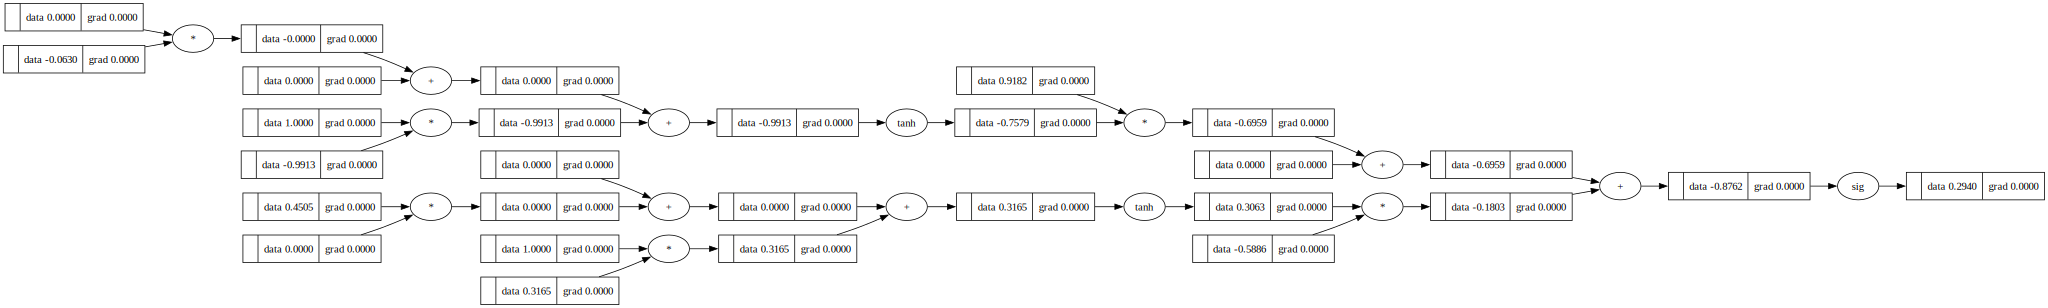

In [140]:
#muestra el grafo computacional del modelo para la primera prediccion (resultado de la etapa forward)
show_graph(yHats[1])

In [ ]:
#Bucle de entrenamiento del modelo 

lr = 0.0005
step = 10000
resultados = []
for _ in range(step):
    #forward pass
    yHats = [modelo(x)[0] for x in xs]

    #calculo de la perdida (loss)
    loss = sum([(y-yhat)**2 for y,yhat, in zip(ys, yHats)])/4

    #Gradientes en cero
    for p in modelo.parameters():
        p.grad = 0
    
    #backward pass
    loss.backward()

    #Se agregan los resultados de la perdida para graficar
    resultados.append(loss.data)

    #Actualizacion de los pesos
    for p in modelo.parameters():
        p.data -= p.grad * lr

loss

Value(data=6.284235748333996e-06, grad=1, name=)

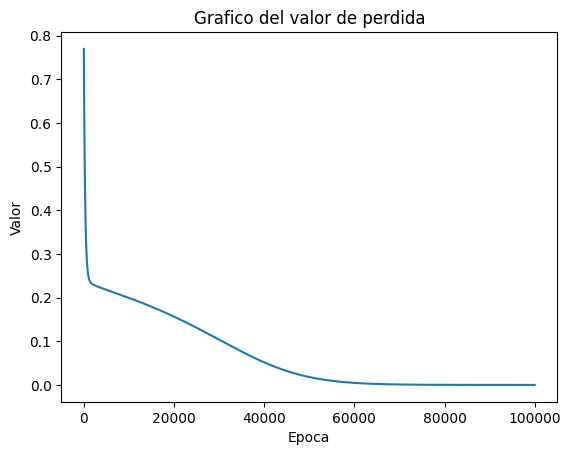

In [161]:
#funcion para graficar el valor de perdida del modelo

import matplotlib.pyplot as plt 


plt.plot(resultados)

plt.title("Grafico del valor de perdida")
plt.xlabel("Epoca")
plt.ylabel("Valor")

plt.show()


In [162]:
yhats = [modelo(x)[0] for x in xs]

print("Predicciones finales despues del entrenamiento:")
print("[0, 0]: esperado -> 0, obtenido -> ", yhats[0].data)
print("[0, 1]: esperado -> 1, obtenido -> ", yhats[1].data)
print("[1, 0]: esperado -> 1, obtenido -> ", yhats[2].data)
print("[1, 1]: esperado -> 0, obtenido -> ", yhats[3].data)

Predicciones finales despues del entrenamiento:
[0, 0]: esperado -> 0, obtenido ->  0.0019404044451708513
[0, 1]: esperado -> 1, obtenido ->  0.9978661791392636
[1, 0]: esperado -> 1, obtenido ->  0.9978652482194836
[1, 1]: esperado -> 0, obtenido ->  0.003501014127081925
